<a href="https://colab.research.google.com/github/adityajain2407/aj-biz-cases/blob/main/Stud_Jamboree_LinerRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
'''
ambooree - entrance exam to college admition
whenver yhou enter marks and other details, they want to predict hte chance of admission - historic data is given to create this predictor
We are checking univariate- to check distribution, of cols
bi-variate to check relationship of 2 variables - general intution - if good at one exam score, liekly to be good in other as well
correlation matrix - as can see cgpa is highly correlated to admit to college
'''

'\nambooree - entrance exam to college admition\nwhenver yhou enter marks and other details, they want to predict hte chance of admission - historic data is given to create this predictor\nWe are checking univariate- to check distribution, of cols\nbi-variate to check relationship of 2 variables - general intution - if good at one exam score, liekly to be good in other as well\ncorrelation matrix - as can see cgpa is highly correlated to admit to college\n'

In [7]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('./Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.shape

(500, 9)

Now, let us drop the irrelevant column and check if there are any null values in the dataset

In [9]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Lets see the distribution of the variables of graduate applicants.

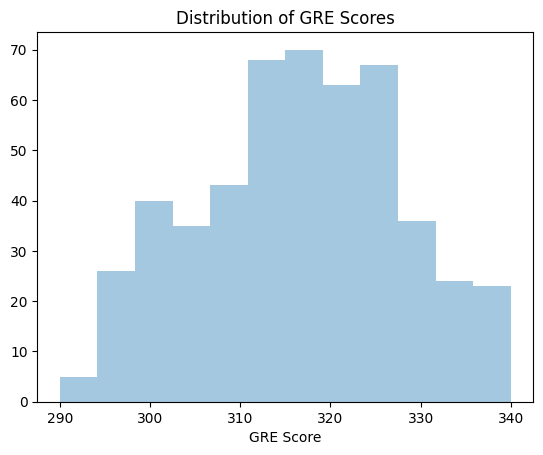

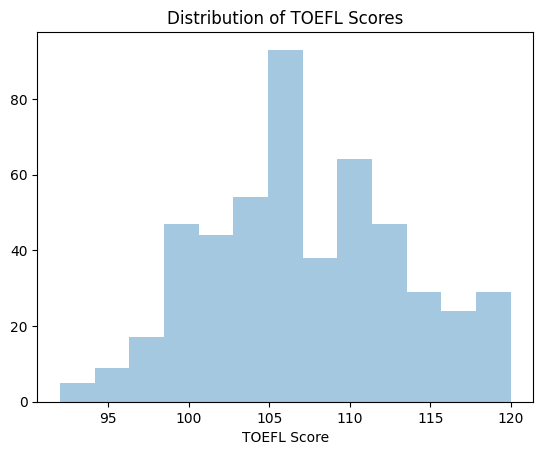

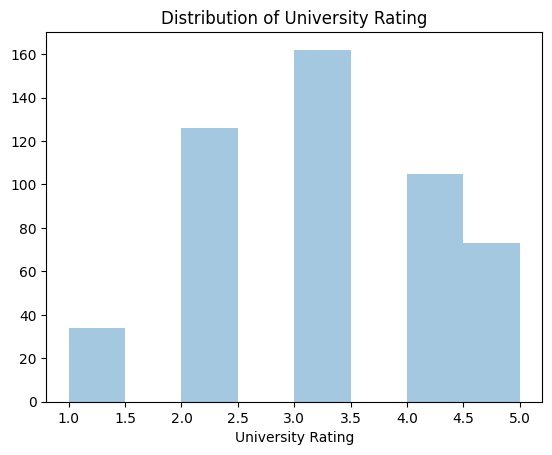

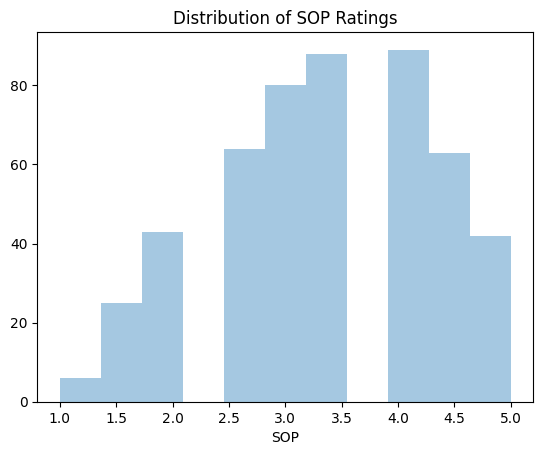

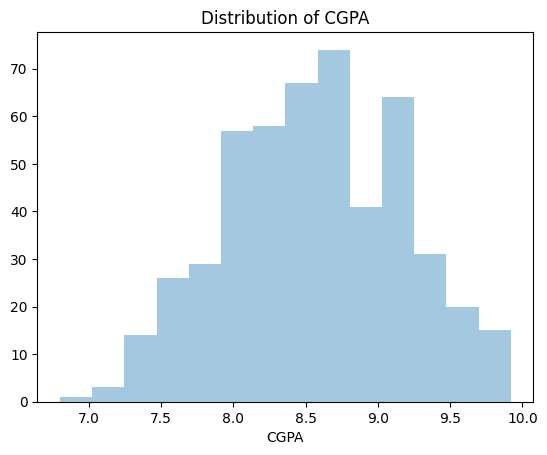

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

It is clear from the distributions, students with varied merit apply for the university.


**Understanding the relation between different factors responsible for graduate admissions**

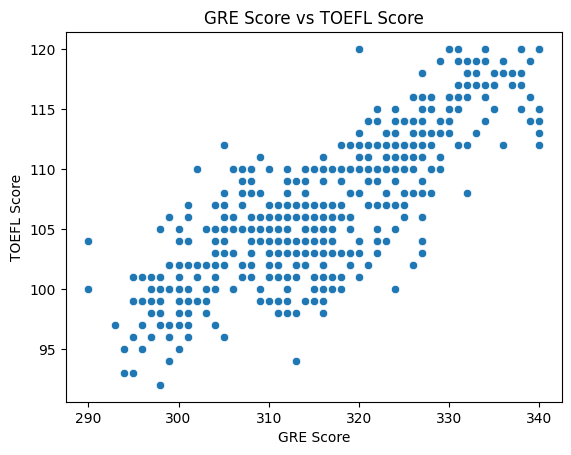

In [15]:
fig = sns.scatterplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

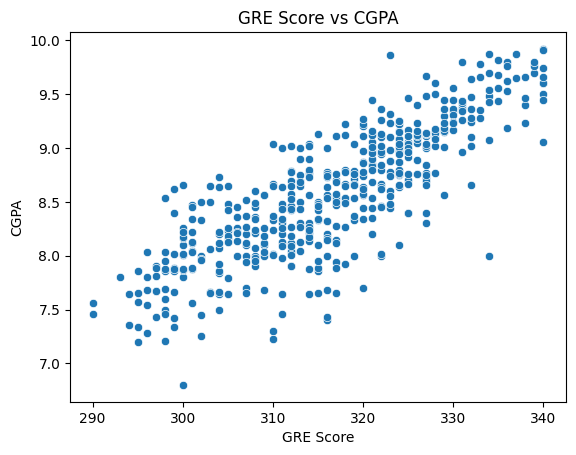

In [16]:
fig = sns.scatterplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()
#linear relationship between both scores

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

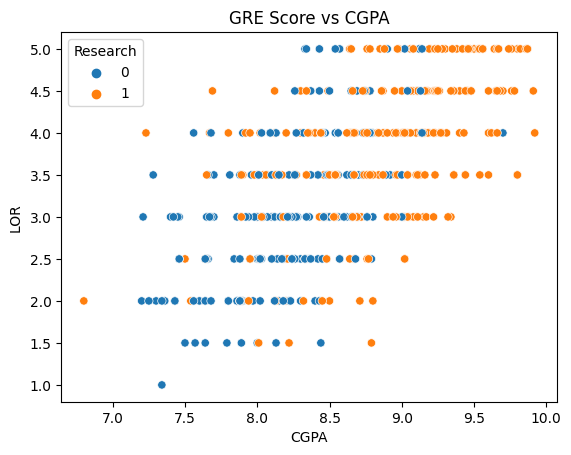

In [13]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()
#obs - more research paper students in the high cgpa and high lor area

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

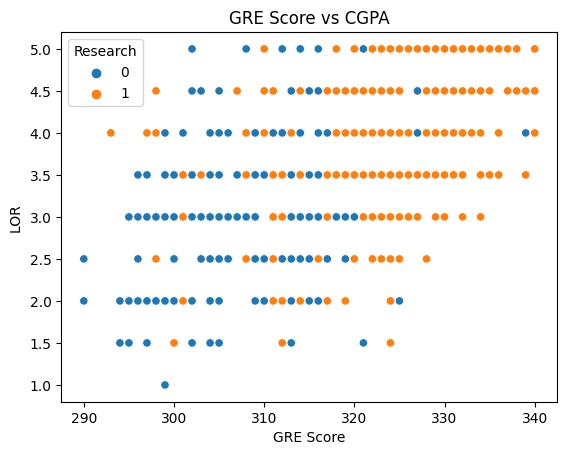

In [18]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores

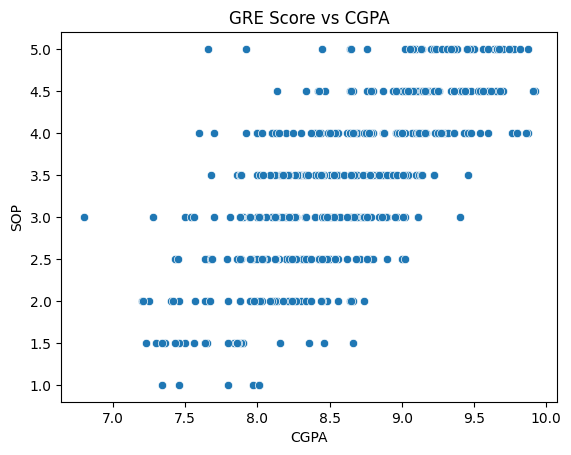

In [19]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight  move towards higher CGPA as along with good SOPs

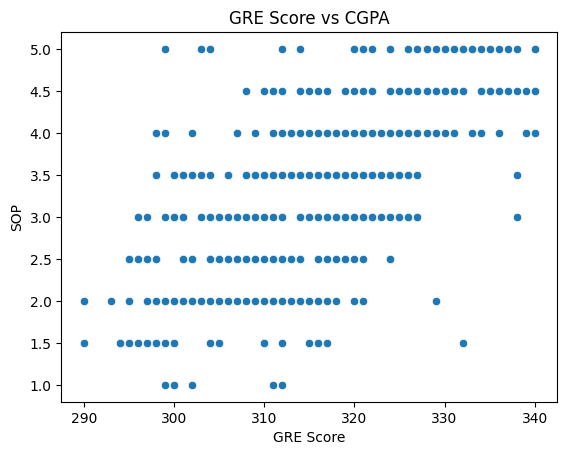

In [20]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Similary, GRE Score and CGPA is only slightly related

> Indented block

> Indented block





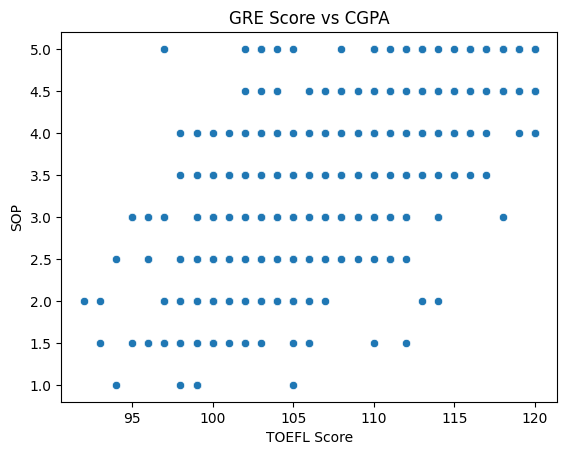

In [21]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.

**Correlation among variables**

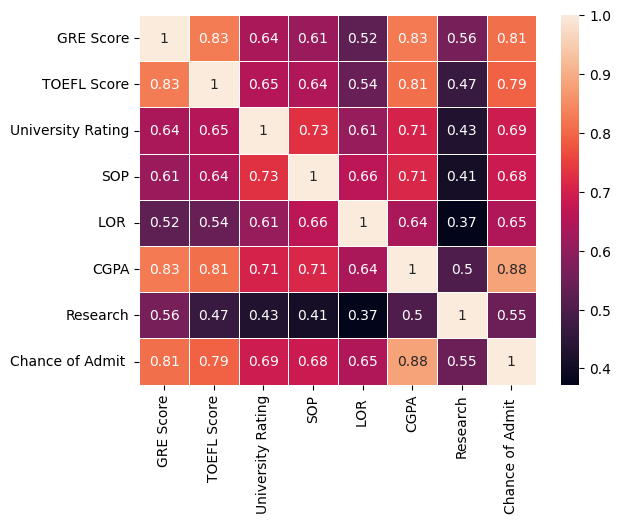

In [22]:
import numpy as np
corr = df.corr()
#fig, ax = plt.subplots(figsize=(8, 8))
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
#dropSelf = np.zeros_like(corr)
#dropSelf[np.triu_indices_from(dropSelf)] = True
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

#cgpa is most correlated to chance of admission -

Lets split the dataset with training and testing set and prepare the inputs and outputs

In [23]:
from sklearn.model_selection import train_test_split

#y is target rest is train features
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [26]:
#keeping 100 test points and otehr for train, shuffle to remove bias
'''
Split data - train, validation, test - usually in indsutry (as we have a huge data) --> if nothing metynioend, do train test only
Train, then check metrics on validation - dont touch test data.
Use test only just before rolling out the model
shuffle true--> so that no bias--> shuffle before splitting (edited)
'''
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)


In [27]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
390,314,102,2,2.0,2.5,8.24,0
163,317,105,3,3.5,3.0,8.56,0
179,307,102,3,3.0,3.0,8.27,0
385,335,117,5,5.0,5.0,9.82,1
243,325,114,3,3.5,3.0,9.04,1
...,...,...,...,...,...,...,...
340,312,107,3,3.0,3.0,8.46,1
430,311,104,3,4.0,3.5,8.13,1
165,322,110,5,4.5,4.0,8.97,0
350,318,107,3,3.0,3.5,8.27,1


In [28]:
y_train

390    0.64
163    0.68
179    0.73
385    0.96
243    0.76
       ... 
340    0.75
430    0.74
165    0.78
350    0.74
291    0.56
Name: Chance of Admit , Length: 400, dtype: float64

In [29]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

'''
Standardization we do before splitting
why? to avoid data leakage--> alredy informaing trhe model that you can expect htis type of data
 train should not be infouenced by test data. else we are creating a bias as its not unseen anymore if we do on overall data without splitting

We prefer statsmodel oever SKlearn for linaer regressoin
OLS --> ordinary least squared method

Regularization will not be that useful as dataset is small -- 400 trainig points]
'''


'\nStandardization we do before splitting\nwhy? to avoid data leakage--> alredy informaing trhe model that you can expect htis type of data\n train should not be infouenced by test data. else we are creating a bias as its not unseen anymore if we do on overall data without splitting\n\nWe prefer statsmodel oever SKlearn for linaer regressoin\nOLS --> ordinary least squared method\n\nRegularization will not be that useful as dataset is small -- 400 trainig points]\n'

In [30]:
X_train_std

array([[-2.16072827e-01, -8.47696805e-01, -9.77667857e-01, ...,
        -1.08320859e+00, -5.39177871e-01, -1.13389342e+00],
       [ 5.85960209e-02, -3.39586832e-01, -9.88652890e-02, ...,
        -5.34748545e-01,  7.08433803e-03, -1.13389342e+00],
       [-8.56966805e-01, -8.47696805e-01, -9.88652890e-02, ...,
        -5.34748545e-01, -4.87965789e-01, -1.13389342e+00],
       ...,
       [ 5.16377434e-01,  5.07263123e-01,  1.65873985e+00, ...,
         5.62171548e-01,  7.06982794e-01, -1.13389342e+00],
       [ 1.50152304e-01, -8.46849955e-04, -9.88652890e-02, ...,
         1.37115012e-02, -4.87965789e-01,  8.81917104e-01],
       [-1.49786078e+00, -8.47696805e-01, -9.77667857e-01, ...,
        -1.63166864e+00, -1.17079355e+00, -1.13389342e+00]])

In [31]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)


In [32]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.216073,-0.847697,-0.977668,-1.397896,-1.083209,-0.539178,-1.133893
1,0.058596,-0.339587,-0.098865,0.136848,-0.534749,0.007084,-1.133893
2,-0.856967,-0.847697,-0.098865,-0.374733,-0.534749,-0.487966,-1.133893
3,1.706609,1.692853,1.658740,1.671592,1.659092,2.157992,0.881917
4,0.791046,1.184743,-0.098865,0.136848,-0.534749,0.826478,0.881917
...,...,...,...,...,...,...,...
395,-0.399185,-0.000847,-0.098865,-0.374733,-0.534749,-0.163623,0.881917
396,-0.490742,-0.508957,-0.098865,0.648429,0.013712,-0.726956,0.881917
397,0.516377,0.507263,1.658740,1.160011,0.562172,0.706983,-1.133893
398,0.150152,-0.000847,-0.098865,-0.374733,0.013712,-0.487966,0.881917


Lets use a bunch of different algorithms to see which model performs better

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.1)], #try with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)] #try with different alpha values
          ]

print("Results without removing features with multicollinearity ...")


for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

    #ADD MAPE

Results without removing features with multicollinearity ...
Linear Regression : 0.06941747833773451
Lasso Regression : 0.14917316933659514
Ridge Regression : 0.06943705667379776


## Linear Regression using Statsmodel library


- Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
- Interest_Rate coefficient represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)
- Unemployment_Rate coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)
- std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
- P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
- Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)


In [34]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())


'''

Also, we usually not prefer sklearn for linear regression, we prefer statsmodel --> it gives more stats --> more powerful interpretation of model
Coef is telling - how good that coeff is
null hyp is--> importance of this variable is 0
so alternative is--> feature is imp

so any feature that is p<0.05 is good for us as we can reject null hypo
so here we have to remove SOP from our table as we might lead to multi-colilnearity--> be getting/capturing that info indirectly from other features (can also mean unrealted)
this is why statmodel is imp
t is test statistic - read about this after lec in general will help
after removing sop you can again check - and there is no change in Rsqaure
if asked
sop is second step, imp is tofl and gre score- 1st step, if no score, sop might not help much


Mean of residuals should be closer to 0 --> normal distribution (plotting positive errors and negative ones)
resudulas should not have any pattern - means homogneously spread (this is bonus- will give notebook, can explore these things)
As can seee, our model is having less error where cahnce of admission are high
Scope of improvmeents:
'''

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     253.6
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          2.78e-141
Time:                        13:01:23   Log-Likelihood:                 579.08
No. Observations:                 400   AIC:                            -1142.
Df Residuals:                     392   BIC:                            -1110.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7186      0.00

'\n\nAlso, we usually not prefer sklearn for linear regression, we prefer statsmodel --> it gives more stats --> more powerful interpretation of model\nCoef is telling - how good that coeff is\nnull hyp is--> importance of this variable is 0\nso alternative is--> feature is imp\nso any feature that is p<0.05 is good for us as we can reject null hypo\nso here we have to remove SOP from our table as we might lead to multi-colilnearity--> be getting/capturing that info indirectly from other features (can also mean unrealted)\nthis is why statmodel is imp\nt is test statistic - read about this after lec in general will help\nafter removing sop you can again check - and there is no change in Rsqaure\nif asked\nsop is second step, imp is tofl and gre score- 1st step, if no score, sop might not help much\n\nMean of residuals should be closer to 0 --> normal distribution (plotting positive errors and negative ones)\nresudulas should not have any pattern - means homogneously spread (this is bon

In [35]:
X_train_new=X_train.drop(columns='SOP')

In [36]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     295.7
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          2.61e-142
Time:                        13:01:23   Log-Likelihood:                 578.54
No. Observations:                 400   AIC:                            -1143.
Df Residuals:                     393   BIC:                            -1115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7186      0.00

## Mean of Residuals

In [46]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.0007830710037334027


## Test for Homoscedasticity

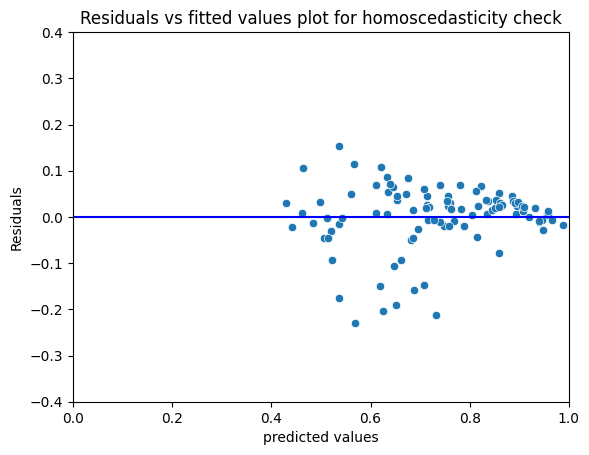

In [47]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [48]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 1.1446547163507363), ('p-value', 0.33177334866770053)]

#### Here `null hypothesis` is - error terms are homoscedastic and since p-values >0.05, we fail to reject the null hypothesis

## Normality of residuals

'\nMean of residuals should be closer to 0 --> normal distribution (plotting positive errors and negative ones)\nresudulas should not have any pattern - means homogneously spread (this is bonus- will give notebook, can explore these things)\nAs can seee, our model is having less error where cahnce of admission are high\nScope of improvmeents:\n\n'

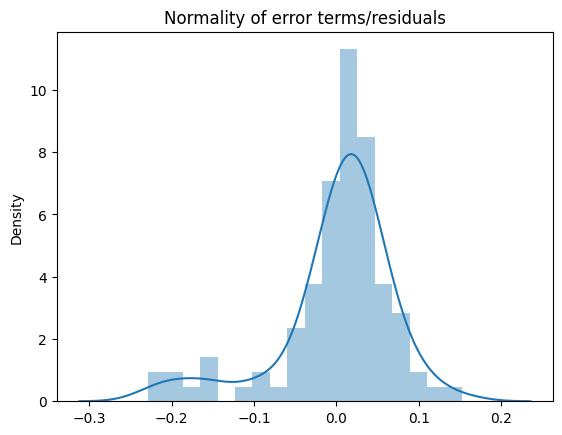

In [49]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')


'''
Mean of residuals should be closer to 0 --> normal distribution (plotting positive errors and negative ones)
resudulas should not have any pattern - means homogneously spread (this is bonus- will give notebook, can explore these things)
As can seee, our model is having less error where cahnce of admission are high
Scope of improvmeents:

'''

'\nScope of improvmeents:\n'

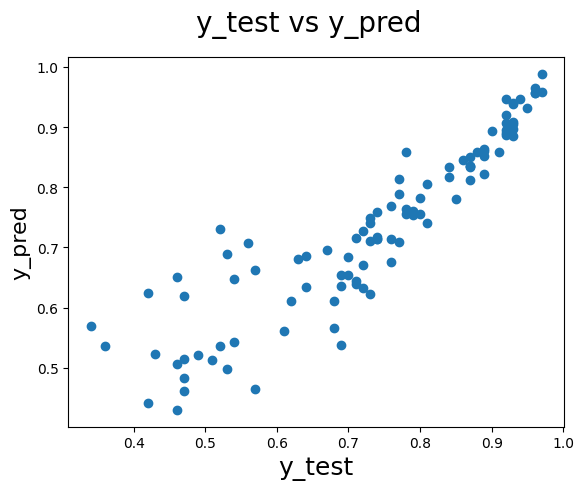

In [50]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

'''
Scope of improvmeents:
'''

# Is this good? we are seeing a pattern?

## Bias-Variance Tradeoff

- Bias is as a result of over simplified model assumptions
- Variance occurs when the assumptions are too complex

- The more preferred model is one with low bias and low varinace.

- Dimensionality reduction and feature selection can decrease variance by simplifying models.

- Similarly, a larger training set tends to decrease variance.

- For reducing Bias: Change the model, Ensure the date is truly representative(Ensure that the training data is diverse and represents all possible groups or outcomes.), Parameter tuning.

- The bias–variance decomposition forms the conceptual basis for regression regularization methods such as Lasso and ridge regression.

- Regularization methods introduce bias into the regression solution that can reduce variance considerably relative to the ordinary least squares (OLS) solution.

- Although the OLS solution provides non-biased regression estimates, the lower variance solutions produced by regularization techniques provide superior MSE performance.

- Linear and Generalized linear models can be regularized to decrease their variance at the cost of increasing their bias.

In [51]:
#INSIGHTS AND RECOMMENDATIONS